# Worksheet 15

Name:  Renming Zhang
UID: U97677301

### Topics

- Support Vector Machines

## Support Vector Machines

a) Follow along in class to implement the perceptron algorithm and create an animation of the algorithm.

In [8]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

TEMPFILE = "temp.png"
CENTERS = [[0, 1], [1, 0]]

# Dataset
X, labels = datasets.make_blobs(n_samples=10, centers=CENTERS, cluster_std=0.2, random_state=0)
Y = np.array(list(map(lambda x: -1 if x == 0 else 1, labels.tolist())))

# Initializing w and b
w = np.array([1, 1], dtype=float)  # Set dtype to float
b = 0.1

# Perceptron Parameters
epochs = 100
alpha = 0.05
expanding_rate = 0.99
retracting_rate = 1.1


def snap(x, w, b, error):
    """
        Plot the street induced by w and b.
        Circle the point x in red if it was
        misclassified or in yellow if it was
        classified correctly.
    """

    xplot = np.linspace(-3, 3)
    cs = np.array([x for x in 'gb'])

    svm = (-w[0] * xplot - b) / w[1]
    left_svm = (-w[0] * xplot - b + 1) / w[1]
    right_svm = (-w[0] * xplot - b - 1) / w[1]

    fig, ax = plt.subplots()
    ax.scatter(X[:, 0], X[:, 1], color=cs[labels].tolist(), s=50, alpha=0.8)
    if error:
        ax.add_patch(plt.Circle((x[0], x[1]), 0.2, color='r', fill=False))
    else:
        ax.add_patch(plt.Circle((x[0], x[1]), 0.2, color='y', fill=False))
    ax.plot(xplot, left_svm, 'g--', lw=2)
    ax.plot(xplot, svm, 'r-', lw=2)
    ax.plot(xplot, right_svm, 'b--', lw=2)
    ax.set_xlim(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
    ax.set_ylim(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
    fig.savefig(TEMPFILE)
    plt.close()

    return im.fromarray(np.asarray(im.open(TEMPFILE)))


images = []
for _ in range(epochs):
    # pick a point from X at random
    i = np.random.randint(0, len(X))  # Corrected line
    x, y = X[i], Y[i]
    error = False

    if y * (np.dot(w, x) + b) <= 0:
        w = w + alpha * y * x  # Ensuring the dtype is the same
        b = b + alpha * y  # Ensuring the dtype is the same
        error = True

    images.append(snap(x, w, b, error))

images[0].save(
    'svm.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=100
)


b) Consider the following dataset:

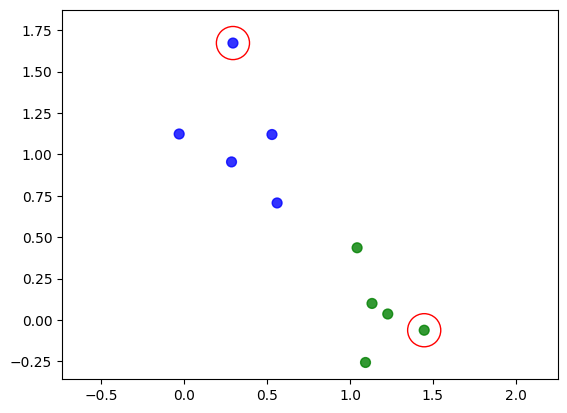

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[0, 1], [1, 0]]
X, _ = datasets.make_blobs(n_samples=10, centers=centers, cluster_std=0.3, random_state=0)
Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])

cs = np.array([x for x in 'bg'])
_, ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],color=cs[Y].tolist(), s=50, alpha=0.8)
ax.set_aspect('equal', adjustable='datalim')
ax.add_patch(plt.Circle((X[0][0], X[0][1]), .1, color='r',fill=False))
ax.add_patch(plt.Circle((X[1][0], X[1][1]), .1, color='r',fill=False))
plt.show()

if we fit an SVM to the above dataset, moved the points circled in red, and re-fit the SVM, describe how the fit would change depending on how the points are moved.

1. Minor movements within a range might not significantly change the decision boundary.
2. Adjustments maintaining optimal separation could lead to slight shifts in the hyperplane.
3. Misclassification of other points might lead to significant changes in the decision boundary to ensure correct classification.
4. Movement impacting overfitting or underfitting would require finding a new balance in classification.

c) If we were to fit an SVM to the above dataset, which points do you think would affect the decision boundary the most? Circle them in red.

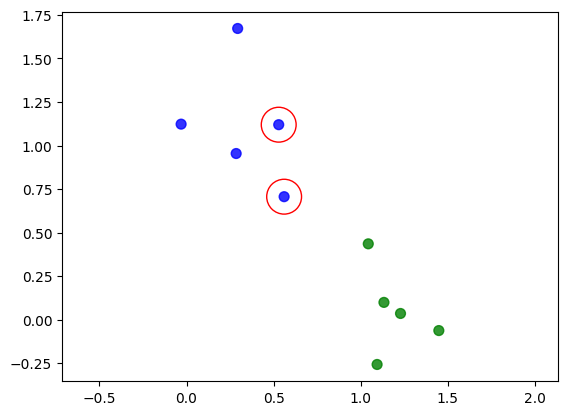

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[0, 1], [1, 0]]
X, _ = datasets.make_blobs(n_samples=10, centers=centers, cluster_std=0.3, random_state=0)
Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])

# Find the points closest to the decision boundary
distances = [abs(x[0] - x[1]) for x in X]
closest_points_indices = np.argsort(distances)[:2]

cs = np.array([x for x in 'bg'])
_, ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],color=cs[Y].tolist(), s=50, alpha=0.8)
ax.set_aspect('equal', adjustable='datalim')

# Circle the points that affect the decision boundary the most
for i in closest_points_indices:
    ax.add_patch(plt.Circle((X[i][0], X[i][1]), .1, color='r',fill=False))

plt.show()
